In [1]:
train_data_path = f'../data/JA_Dataset_240229.csv'

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv(train_data_path)

In [3]:
df

,date,Week Start,Week End,Week Number,Shipment,Week Shipment,Teisyoku,Week Teisyoku,Temp,Week Temp,...,WNDDIR,Week WNDDIR,WNDSPD,Week WNDSPD,RHUM,Week RHUM,Rain,Week Rain,Status,Week Status
0,2017/12/31 0:00,2017/12/31 0:00,2018/1/6 0:00,23,2131.999998,7277.999998,0,0,6.4,34.6,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.5,1,3
1,2018/1/1 0:00,2017/12/31 0:00,2018/1/6 0:00,23,0.000000,7277.999998,0,0,6.8,34.6,...,161.085106,1147.126773,0.627660,6.92141,74.872340,384.434840,0.0,0.5,0,3
2,2018/1/2 0:00,2017/12/31 0:00,2018/1/6 0:00,23,0.000000,7277.999998,0,0,5.4,34.6,...,254.437500,1147.126773,1.552083,6.92141,63.583333,384.434840,0.0,0.5,0,3
3,2018/1/3 0:00,2017/12/31 0:00,2018/1/6 0:00,23,0.000000,7277.999998,0,0,6.3,34.6,...,197.770833,1147.126773,2.422917,6.92141,40.604167,384.434840,0.0,0.5,0,3
4,2018/1/4 0:00,2017/12/31 0:00,2018/1/6 0:00,23,2656.000000,7277.999998,0,0,2.9,34.6,...,159.333333,1147.126773,0.727083,6.92141,56.270833,384.434840,0.0,0.5,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,2023/11/21 0:00,2023/11/19 0:00,2023/11/25 0:00,17,1055.000000,6745.000000,0,0,11.8,96.3,...,195.562500,1464.000000,0.791667,12.82500,77.875000,480.979167,0.0,1.0,1,5
2152,2023/11/22 0:00,2023/11/19 0:00,2023/11/25 0:00,17,0.000000,6745.000000,0,0,14.5,96.3,...,200.458333,1464.000000,1.185417,12.82500,81.604167,480.979167,0.0,1.0,0,5
2153,2023/11/23 0:00,2023/11/19 0:00,2023/11/25 0:00,17,1967.000000,6745.000000,0,0,16.5,96.3,...,231.895833,1464.000000,1.900000,12.82500,78.166667,480.979167,1.0,1.0,1,5
2154,2023/11/24 0:00,2023/11/19 0:00,2023/11/25 0:00,17,1682.000000,6745.000000,0,0,17.8,96.3,...,237.250000,1464.000000,5.079167,12.82500,54.625000,480.979167,0.0,1.0,1,5


In [4]:
# 'Week Start'カラムを日付型に変換
df['Week Start'] = pd.to_datetime(df['Week Start'])

# 連続している同じ日付を識別し、それぞれの塊の最初の行を除外するためのマークをつける
df['duplicate'] = df['Week Start'].duplicated()

# 連続する同じ日付の塊から最初の行以外を削除
df_filtered = df[~df['duplicate']].drop('duplicate', axis=1)  # 'duplicate'カラムも削除


In [5]:
print(max(df_filtered["Week Shipment"]))

17503.0


In [6]:

# Week Shipmentが0の場合にWeek GLBRADとWeek Tempを0に置換
df_filtered['Week GLBRAD'] = np.where(df_filtered['Week Shipment'] == 0, 0, df_filtered['Week GLBRAD'])
df_filtered['Week Temp'] = np.where(df_filtered['Week Shipment'] == 0, 0, df_filtered['Week Temp'])

In [7]:
df_gauess = df_filtered[['Week Shipment', 'date', 'Week Status', 'Week Temp', 'Week GLBRAD', 'Week Number']]
df_gauess['Week Shipment/Week Status'] = np.where(df_filtered['Week Status'] != 0, 
                                         df_filtered['Week Shipment'] / df_filtered['Week Status'], 
                                         0)
df_gauess["Answer"] = df_gauess["Week Shipment"]
df_gauess["Answer/Week Status"] = df_gauess['Week Shipment/Week Status']

C:\Users\bt313\AppData\Local\Temp\ipykernel_34068\3933597109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gauess['Week Shipment/Week Status'] = np.where(df_filtered['Week Status'] != 0,
C:\Users\bt313\AppData\Local\Temp\ipykernel_34068\3933597109.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gauess["Answer"] = df_gauess["Week Shipment"]
C:\Users\bt313\AppData\Local\Temp\ipykernel_34068\3933597109.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [8]:
df_gauess

,Week Shipment,date,Week Status,Week Temp,Week GLBRAD,Week Number,Week Shipment/Week Status,Answer,Answer/Week Status
0,7277.999998,2017/12/31 0:00,3,34.6,NaN,23,2425.999999,7277.999998,2425.999999
7,6983.000000,2018/1/7 0:00,5,38.8,936.229167,24,1396.600000,6983.000000,1396.600000
14,7486.000000,2018/1/14 0:00,5,57.0,865.645833,25,1497.200000,7486.000000,1497.200000
21,7753.000000,2018/1/21 0:00,5,22.1,962.479167,26,1550.600000,7753.000000,1550.600000
28,8333.999999,2018/1/28 0:00,5,29.7,742.270833,27,1666.800000,8333.999999,1666.800000
...,...,...,...,...,...,...,...,...,...
2121,7376.000000,2023/10/22 0:00,6,113.3,1226.395833,13,1229.333333,7376.000000,1229.333333
2128,4387.000000,2023/10/29 0:00,4,114.7,1100.895833,14,1096.750000,4387.000000,1096.750000
2135,12048.000000,2023/11/5 0:00,5,124.7,842.833333,15,2409.600000,12048.000000,2409.600000
2142,7314.000000,2023/11/12 0:00,5,83.7,765.854167,16,1462.800000,7314.000000,1462.800000


In [9]:
# 最大値をシフト前に計算
max_week_shipment = df_gauess["Answer/Week Status"].max()
max_week_temp = df_gauess['Week Temp'].max()
max_week_GL = df_gauess['Week GLBRAD'].max()
max_week_number = df_gauess['Week Number'].max()

# AnswerとWeek Tempの値を上に二つシフトする
df_gauess.loc[:, 'Answer'] = df_gauess['Answer'].shift(-2)
df_gauess.loc[:, 'Answer/Week Status'] = df_gauess['Answer/Week Status'].shift(-2)
df_gauess.loc[:, 'Week Temp'] = df_gauess['Week Temp'].shift(-2)
df_gauess.loc[:, 'Week GLBRAD'] = df_gauess['Week GLBRAD'].shift(-2)
df_gauess.loc[:, 'Week Number'] = df_gauess['Week Number'].shift(-2)
df_gauess.loc[:, 'Week Status'] = df_gauess['Week Status'].shift(-2)
# 下から二つの行を削除
df_gauess = df_gauess.iloc[:-2]

# Week ShipmentとAnswerの値をそれぞれの最大値で割る
df_gauess.loc[:, "Answer/Week Status"] = df_gauess["Answer/Week Status"] / max_week_shipment
df_gauess.loc[:, "Week Shipment/Week Status"] = df_gauess["Week Shipment/Week Status"] / max_week_shipment
df_gauess.loc[:, 'Answer'] = df_gauess['Answer']
df_gauess.loc[:, 'Week Temp'] = df_gauess['Week Temp'] / max_week_temp
df_gauess.loc[:, 'Week GLBRAD'] = df_gauess['Week GLBRAD'] / max_week_GL
df_gauess.loc[:, 'Week Number'] = df_gauess['Week Number'] / max_week_number

In [10]:
df_gauess

,Week Shipment,date,Week Status,Week Temp,Week GLBRAD,Week Number,Week Shipment/Week Status,Answer,Answer/Week Status
0,7277.999998,2017/12/31 0:00,5.0,0.273907,0.357899,0.471698,0.645986,7486.000000,0.398669
7,6983.000000,2018/1/7 0:00,5.0,0.106199,0.397934,0.490566,0.371881,7753.000000,0.412888
14,7486.000000,2018/1/14 0:00,5.0,0.142720,0.306890,0.509434,0.398669,8333.999999,0.443829
21,7753.000000,2018/1/21 0:00,5.0,0.113888,0.549730,0.528302,0.412888,9403.000000,0.500759
28,8333.999999,2018/1/28 0:00,5.0,0.255166,0.586484,0.547170,0.443829,9852.000002,0.524670
...,...,...,...,...,...,...,...,...,...
2107,1693.000000,2023/10/8 0:00,6.0,0.544450,0.507050,0.245283,0.090161,7376.000000,0.327342
2114,2734.000000,2023/10/15 0:00,4.0,0.551177,0.455162,0.264151,0.182000,4387.000000,0.292038
2121,7376.000000,2023/10/22 0:00,5.0,0.599231,0.348467,0.283019,0.327342,12048.000000,0.641619
2128,4387.000000,2023/10/29 0:00,5.0,0.402210,0.316640,0.301887,0.292038,7314.000000,0.389509


In [11]:
print(max(df_gauess["Answer"]))
print(max(df_gauess["Answer/Week Status"]*df_gauess["Week Status"]*max_week_shipment))

17503.0
17503.0


C:\Users\bt313\AppData\Local\Temp\ipykernel_34068\3508831920.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gauess['date'] = pd.to_datetime(df_gauess['date']).dt.date


(85, 9)


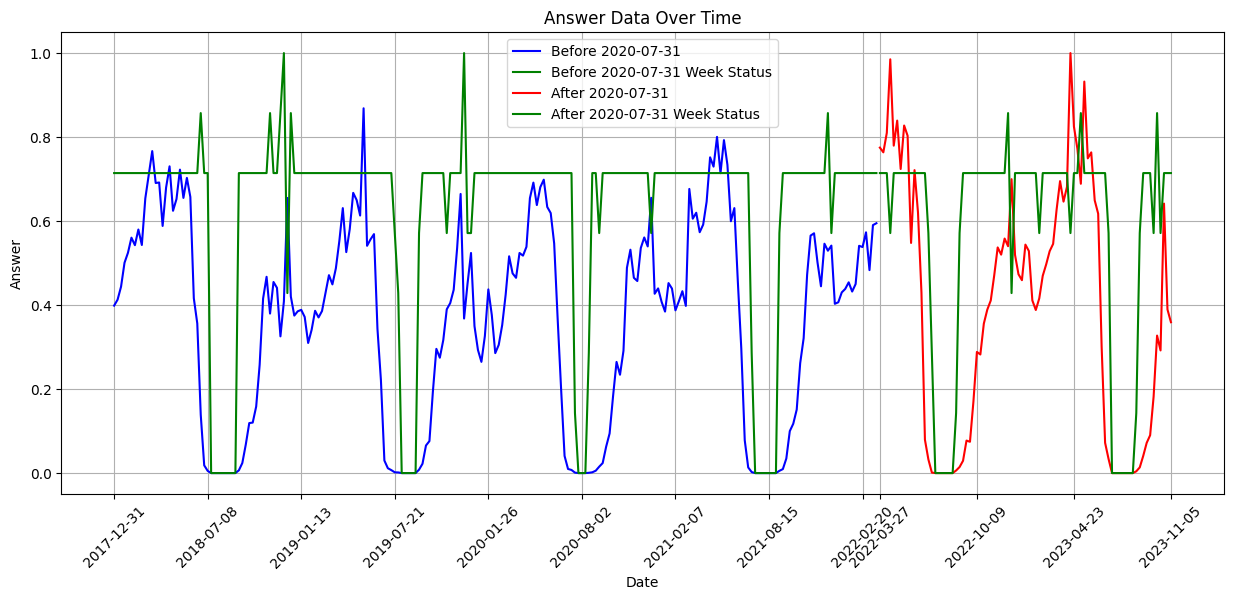

,Week Shipment,date,Week Status,Week Temp,Week GLBRAD,Week Number,Week Shipment/Week Status,Answer,Answer/Week Status
1547,11086.0,2022-03-27,5.0,0.574243,0.590498,0.698113,0.590387,14551.0,0.774917
1554,11171.0,2022-04-03,5.0,0.557424,0.611075,0.716981,0.594914,14340.0,0.763680
1561,14551.0,2022-04-10,5.0,0.621816,0.567732,0.735849,0.774917,15212.0,0.810118
1568,14340.0,2022-04-17,4.0,0.569438,0.793914,0.754717,0.763680,14799.0,0.985155
1575,15212.0,2022-04-24,5.0,0.626141,0.644788,0.773585,0.810118,14639.0,0.779603
...,...,...,...,...,...,...,...,...,...
2107,1693.0,2023-10-08,6.0,0.544450,0.507050,0.245283,0.090161,7376.0,0.327342
2114,2734.0,2023-10-15,4.0,0.551177,0.455162,0.264151,0.182000,4387.0,0.292038
2121,7376.0,2023-10-22,5.0,0.599231,0.348467,0.283019,0.327342,12048.0,0.641619
2128,4387.0,2023-10-29,5.0,0.402210,0.316640,0.301887,0.292038,7314.0,0.389509


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 日付データの処理
df_gauess['date'] = pd.to_datetime(df_gauess['date']).dt.date

# 比較用の日付も datetime.date に変換
cutoff_date = pd.to_datetime('2022-03-20').date()
#cutoff_date = pd.to_datetime('2022-07-31').date()

# データをフィルタリング
before_cutoff = df_gauess[df_gauess['date'] <= cutoff_date]
after_cutoff = df_gauess[df_gauess['date'] > cutoff_date]
print(after_cutoff.shape)

# 日付の表示間隔を設定
before_interval = len(before_cutoff['date']) // 8
after_interval = len(after_cutoff['date']) // 3

plt.figure(figsize=(15, 6))

# before_cutoffのプロット
plt.plot(before_cutoff['date'], before_cutoff['Answer/Week Status'], label='Before 2020-07-31', color='blue')
plt.plot(before_cutoff['date'], before_cutoff['Week Status']/7, label='Before 2020-07-31 Week Status', color='green')

# after_cutoffのプロット
plt.plot(after_cutoff['date'], after_cutoff['Answer/Week Status'], label='After 2020-07-31', color='red')
plt.plot(after_cutoff['date'], after_cutoff['Week Status']/7, label='After 2020-07-31 Week Status', color='green')

# 日付ラベルの設定
plt.xticks(before_cutoff['date'][::before_interval].tolist() + after_cutoff['date'][::after_interval].tolist(), rotation=45)

plt.xlabel('Date')
plt.ylabel('Answer')
plt.title('Answer Data Over Time')
plt.legend()
plt.grid(True)
plt.show()


after_cutoff

In [13]:
print(max(after_cutoff["Answer"]))
print(max(after_cutoff["Answer/Week Status"]*after_cutoff["Week Status"]*max_week_shipment))

17503.0
17503.0


(70, 15)
[[0.57424315 0.55742432 0.62181643 ... 0.88322922 0.87457953 0.92695819]
 [0.55742432 0.62181643 0.56943777 ... 0.87457953 0.92695819 0.95194618]
 [0.62181643 0.56943777 0.62614128 ... 0.92695819 0.95194618 0.        ]
 ...
 [0.         0.         0.         ... 0.63959635 0.54444978 0.55117732]
 [0.         0.         0.         ... 0.54444978 0.55117732 0.59923114]
 [0.         0.         0.         ... 0.55117732 0.59923114 0.40221048]]
(70,)
最適化されたパラメータ: [0.08563708 0.03208029]
(70,) (70,)


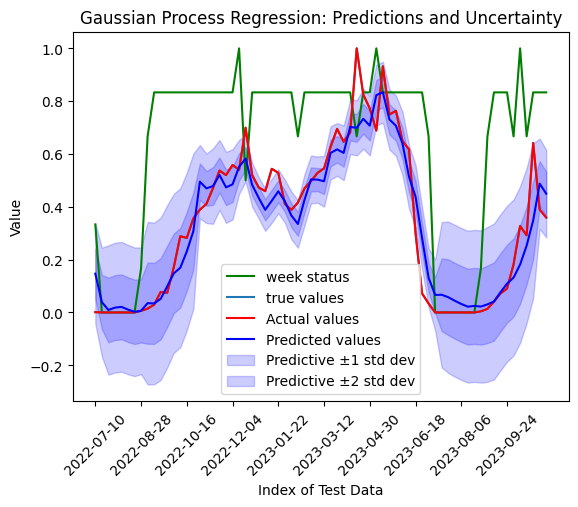

In [14]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ガウスカーネル関数の定義
def kgauss(params):
    [tau, sigma] = params
    return lambda x, y: np.exp(tau) * np.exp(-np.sum((x[:, np.newaxis, :] - y[np.newaxis, :, :])**2, axis=2) / np.exp(sigma))

def kcauchy(params):
    [gamma, alpha] = params
    return lambda x, y: alpha / (1 + (np.sum((x[:, np.newaxis, :] - y[np.newaxis, :, :])**2, axis=2) / np.exp(gamma)**2))


# ガウス過程回帰を行う関数
def gpr(x_train, y_train, x_test, kernel, params):
    K = kernel(params)(x_train, x_train)
    K_inv = np.linalg.inv(K + 1e-6 * np.eye(len(x_train)))
    alpha = K_inv.dot(y_train)

    K_test = kernel(params)(x_train, x_test)
    y_pred = K_test.T.dot(alpha)
    std = np.sqrt(np.diag(kernel(params)(x_test, x_test) - K_test.T.dot(K_inv).dot(K_test)))
    return y_pred, std

# 対数尤度関数の定義
def log_likelihood(params, x_train, y_train, kernel):
    K = kernel(params)(x_train, x_train) + 1e-4 * np.eye(len(x_train))
    K_inv = np.linalg.inv(K)
    sign, logdet = np.linalg.slogdet(K)
    return 0.5 * np.dot(y_train, np.dot(K_inv, y_train)) + 0.5 * logdet + 0.5 * len(x_train) * np.log(2 * np.pi)

# 勾配降下法で最適化する関数
def optimize_params(x_train, y_train, kernel, initial_params):
    result = minimize(log_likelihood, initial_params, args=(x_train, y_train, kernel), method='L-BFGS-B', bounds=[(-5, 5), (-5, 5)])
    return result.x

# サンプルデータの前処理
n = 15  # 連続するデータポイントの数
##############################################################
#df_gauess['date'] = pd.to_datetime(df_gauess['date'])

# m週間前の日付を計算
#cutoff_date = pd.to_datetime('2022-07-31') - 0*pd.Timedelta(weeks=m)
#before_cutoff = df_gauess[(df_gauess['date'] >= '2020-08-06') & (df_gauess['date'] <= cutoff_date)]
#after_cutoff = df_gauess[df_gauess['date'] > cutoff_date]
################################################################
# データをフィルタリング

# サンプルデータの生成
x_train_ship = np.array(before_cutoff['Week Shipment/Week Status'].tolist())
x_train_temp = np.array(before_cutoff['Week Temp'].tolist())
x_train_status = np.array(before_cutoff['Week Status'].tolist())
x_train_gl = np.array(before_cutoff['Week GLBRAD'].tolist())
x_train_number = np.array(before_cutoff['Week Number'].tolist())
#x_train_status = np.array(before_cutoff['Week Status'].tolist())

x_test_ship = np.array(after_cutoff['Week Shipment/Week Status'].tolist())
x_test_temp = np.array(after_cutoff['Week Temp'].tolist())
x_test_status_ = np.array(after_cutoff['Week Status'].tolist())
x_test_gl = np.array(after_cutoff['Week GLBRAD'].tolist())
x_test_number = np.array(after_cutoff['Week Number'].tolist())
#x_test_status = np.array(after_cutoff['Week Status'].tolist())


x_train_temp_ = np.array([x_train_temp[i-n:i] for i in range(n,len(x_train_temp))])
x_train_ship_ = np.array([x_train_ship[i-n:i] for i in range(n,len(x_train_ship))])
#x_train_status_ = np.array([x_train_status[i-n:i] for i in range(n,len(x_train_ship))])
x_train_gl_ = np.array([x_train_gl[i-n:i] for i in range(n,len(x_train_ship))])
x_train_number_ = np.array([x_train_number[i-n:i] for i in range(n,len(x_train_number))])
y_train = np.array(before_cutoff['Answer/Week Status'].tolist())[n:]

x_test_temp_ = np.array([x_test_temp[i-n:i] for i in range(n,len(x_test_temp))])
x_test_ship_ = np.array([x_test_ship[i-n:i] for i in range(n,len(x_test_ship))])
#x_test_status_ = np.array([x_test_status[i-n:i] for i in range(n,len(x_test_ship))])
x_test_gl_ = np.array([x_test_gl[i-n:i] for i in range(n,len(x_test_gl))])
x_test_number_ = np.array([x_test_number[i-n:i] for i in range(n,len(x_test_number))])
y_test = np.array(after_cutoff['Answer/Week Status'][n:].tolist())
print(x_test_temp_.shape)
print(x_test_temp_)
print(y_test.shape)

# 各行列を横に連結して、40個の値を持つベクトルにする
x_train = np.hstack((x_train_temp_, x_train_gl_, x_train_number_))
x_test = np.hstack((x_test_temp_, x_test_gl_, x_test_number_))
#x_train = np.hstack((x_train_ship_, x_train_temp_, x_train_gl_, x_train_number_))
#x_test = np.hstack((x_test_ship_, x_test_temp_, x_test_gl_, x_test_number_))
#x_train = x_train_ship_
#x_test = x_test_ship_

# モデルの訓練と予測
#kernel = kgauss
kernel = kcauchy
optimal_params = optimize_params(x_train, y_train, kernel, [0.0, 0.0])
print("最適化されたパラメータ:", optimal_params)
y_pred, std = gpr(x_train, y_train, x_test, kernel, optimal_params)

# プロット
hoge = after_cutoff["Week Status"][n:]
hoge_date = after_cutoff["date"][n:]
hoge_date_np = pd.to_datetime(hoge_date).dt.date
hoge_date_np = np.array(hoge_date_np)  # NumPy配列に変換
# 日付の表示間隔を設定
interval = len(hoge_date) // 10  # 要調整


print(hoge_date_np.shape, y_test.shape)
plt.plot(hoge_date_np, hoge/6, 'g-', label='week status')
plt.plot(hoge_date_np, after_cutoff["Answer/Week Status"][n:],  label='true values')
plt.plot(hoge_date_np, y_test, 'r-', label='Actual values')
plt.plot(hoge_date_np, y_pred, 'b-', label='Predicted values')
plt.fill_between(hoge_date_np, y_pred - 1 * std, y_pred + 1 * std, color='blue', alpha=0.2, label='Predictive ±1 std dev')
plt.fill_between(hoge_date_np, y_pred - 2 * std, y_pred + 2 * std, color='blue', alpha=0.2, label='Predictive ±2 std dev')
#plt.fill_between(hoge_date_np, y_pred - 3 * std, y_pred + 3 * std, color='blue', alpha=0.2, label='Predictive ±3 std dev')
plt.xlabel('Index of Test Data')
plt.ylabel('Value')
plt.title('Gaussian Process Regression: Predictions and Uncertainty')
# 横軸の日付ラベルの設定
plt.xticks(hoge_date_np[::interval], rotation=45)  # 45度に回転
plt.legend()
plt.show()


(85,)


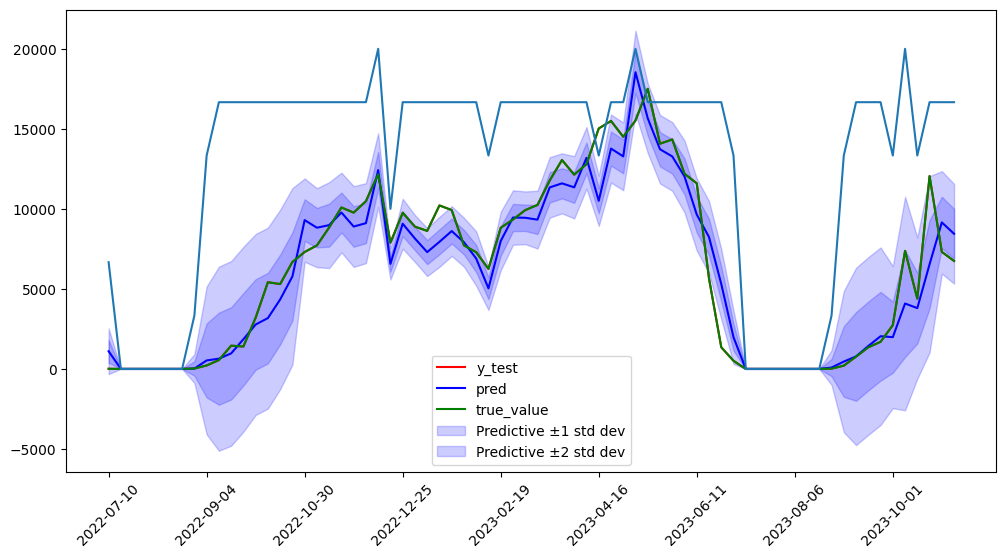

In [15]:
# 日付の表示間隔を設定
interval = len(hoge_date) // 8  # 要調整
product = y_test * hoge
pred_product = y_pred * hoge
scaled_product = product * max_week_shipment
scaled_pred = pred_product * max_week_shipment


plt.figure(figsize=(12, 6))
plt.plot(hoge_date_np,scaled_product, 'r-', label="y_test")
plt.plot(hoge_date_np, abs(scaled_pred), 'b-', label="pred")
plt.plot(hoge_date_np, after_cutoff["Answer"][n:], 'g-', label="true_value")
plt.plot(hoge_date_np, after_cutoff["Week Status"][n:]*(20000/6))
pred_std = std * hoge * max_week_shipment
plt.fill_between(hoge_date_np, scaled_pred - 1 * pred_std, scaled_pred + 1 * pred_std, color='blue', alpha=0.2, label='Predictive ±1 std dev')
plt.fill_between(hoge_date_np, scaled_pred - 2 * pred_std, scaled_pred + 2 * pred_std, color='blue', alpha=0.2, label='Predictive ±2 std dev')
# 横軸に日付ラベルを間隔で表示
plt.xticks(hoge_date_np[::interval], rotation=45)  # 45度に回
plt.legend()
plt.show
print((after_cutoff["Answer"]/after_cutoff["Week Status"]).shape)

data = {
    "week_shipment": after_cutoff["Answer"],
    "pred": scaled_pred
}
df = pd.DataFrame(data)
df.to_csv("./Week_Shipment_Prediction.csv", index=False)

#for i in hoge:
   # print(i)

In [16]:
import numpy as np

# scaled_predから最大値のインデックスを取得
max_index = np.argmax(scaled_pred)
max_index_ = np.argmax(scaled_product)
# 最大値の日付を取得
max_date = hoge_date_np[max_index]
max_date_ = hoge_date_np[max_index_]
print("scaled_predが最大の値を取る日付:", max_date)
print("scaled_productが最大の値を取る日付:", max_date_)
# 検索する日付を指定
search_date = pd.to_datetime(max_date).date()
# 日付列が datetime 型であることを確認（必要に応じて変換）
after_cutoff['date'] = pd.to_datetime(after_cutoff['date'])

# 特定の日付のデータを取得
data_on_search_date = after_cutoff[after_cutoff['date'] == pd.Timestamp(max_date)]

# 結果を表示
print(data_on_search_date)
# 日付配列 hoge_date_np から指定した日付のインデックスを検索
try:
    date_index = np.where(hoge_date_np == search_date)[0][0]  # 最初に一致したインデックスを取得
    pred_value = y_pred[date_index]  # そのインデックスに対応するy_predの値を取得
    print(f"{search_date} の予測値: {pred_value}")
    print(pred_value*after_cutoff["Week Status"].iloc[max_index]*max_week_shipment)
except IndexError:
    print(f"{search_date} の日付はデータに存在しません。")


scaled_predが最大の値を取る日付: 2023-05-07
scaled_productが最大の値を取る日付: 2023-05-14
      Week Shipment       date  Week Status  Week Temp  Week GLBRAD  \
1953        15496.0 2023-05-07          6.0   0.662662     0.712508   

      Week Number  Week Shipment/Week Status   Answer  Answer/Week Status  
1953     0.811321                   0.825243  15521.0            0.688812  
2023-05-07 の予測値: 0.8227763890109332
15449.683644652798


C:\Users\bt313\AppData\Local\Temp\ipykernel_34068\1182625751.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_cutoff['date'] = pd.to_datetime(after_cutoff['date'])


In [17]:
import pandas as pd

# 日付列が datetime 型であることを確認（必要に応じて変換）
after_cutoff['date'] = pd.to_datetime(after_cutoff['date'])

# 特定の日付を設定
specific_date = pd.Timestamp('2023-05-07')

# 特定の日付の前後のデータを取得
# 例として、前後1日のデータを取得
data_around_specific_date = after_cutoff[(after_cutoff['date'] >= specific_date - pd.Timedelta(days=30)) & 
                                          (after_cutoff['date'] <= specific_date + pd.Timedelta(days=30))]

# 結果を表示
data_around_specific_date


C:\Users\bt313\AppData\Local\Temp\ipykernel_34068\1175941777.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_cutoff['date'] = pd.to_datetime(after_cutoff['date'])


,Week Shipment,date,Week Status,Week Temp,Week GLBRAD,Week Number,Week Shipment/Week Status,Answer,Answer/Week Status
1925,13053.0,2023-04-09,5.0,0.533397,0.662213,0.735849,0.695140,12798.0,0.681560
1932,12136.0,2023-04-16,4.0,0.648727,0.826387,0.754717,0.646305,15022.0,1.000000
1939,12798.0,2023-04-23,5.0,0.580971,0.636287,0.773585,0.681560,15496.0,0.825243
1946,15022.0,2023-04-30,5.0,0.655454,0.675659,0.792453,1.000000,14502.0,0.772307
1953,15496.0,2023-05-07,6.0,0.662662,0.712508,0.811321,0.825243,15521.0,0.688812
1960,14502.0,2023-05-14,5.0,0.710235,0.483845,0.830189,0.772307,17503.0,0.932126
1967,15521.0,2023-05-21,5.0,0.726574,0.640292,0.849057,0.688812,14071.0,0.749354
1974,17503.0,2023-05-28,5.0,0.791927,0.630197,0.867925,0.932126,14338.0,0.763573
1981,14071.0,2023-06-04,5.0,0.769822,0.604236,0.886792,0.749354,12194.0,0.649394


In [18]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# ガウスカーネル関数の定義
def kgauss(params):
    [tau, sigma, theta] = params
    return lambda x, y: np.exp(tau) * np.exp(-np.sum((x[:, np.newaxis, :] - y[np.newaxis, :, :])**2, axis=2) / (np.exp(sigma) * theta))

# コーシー分布カーネル関数
def kcauchy(params):
    [gamma, alpha] = params
    return lambda x, y: alpha / (1 + (np.sum((x[:, np.newaxis, :] - y[np.newaxis, :, :])**2, axis=2) / np.exp(gamma)**2))

# 勾配降下法で最適化する関数
def optimize_params(x_train, y_train, kernel, initial_params, maxiter=100):
    options = {'maxiter': maxiter, "verbose": 0}
    result = minimize(log_likelihood, initial_params, args=(x_train, y_train, kernel), method='L-BFGS-B', bounds=[(-5, 5), (-5, 5)], options=options, callback=callback)
    return result.x

log_likelihood_values = []  # 対数尤度の値を格納するリスト

def log_likelihood(params, x_train, y_train, kernel):
    K = kernel(params)(x_train, x_train) + 1e-4 * np.eye(len(x_train))
    K_inv = np.linalg.inv(K)
    sign, logdet = np.linalg.slogdet(K)
    value = 0.5 * np.dot(y_train, np.dot(K_inv, y_train)) + 0.5 * logdet + 0.5 * len(x_train) * np.log(2 * np.pi)
    
    log_likelihood_values.append(value)  # 値をリストに追加

    return value

def callback(x):
    print(x)

def optimize_params(x_train, y_train, kernel, initial_params, maxiter=100):
    options = {'maxiter': maxiter, "verbose": 0}
    #result = minimize(log_likelihood, initial_params, args=(x_train, y_train, kernel), method='L-BFGS-B', bounds=[(-5, 5), (-5, 5)], options=options, callback=callback)
    result = minimize(log_likelihood, initial_params, args=(x_train, y_train, kernel), method='L-BFGS-B', bounds=[(-5, 5), (-5, 5)], options=options)
    return result.x

def gpr(x_train, y_train, x_test, kernel, params, reg_param=1e-4):
    K = kernel(params)(x_train, x_train)
    # 正則化項を追加してKの逆行列を求める
    K_inv = np.linalg.inv(K + reg_param * np.eye(len(x_train)))
    alpha = K_inv.dot(y_train)

    K_test = kernel(params)(x_train, x_test)
    y_pred = K_test.T.dot(alpha)
    std = np.sqrt(np.diag(kernel(params)(x_test, x_test) - K_test.T.dot(K_inv).dot(K_test)))
    return y_pred, std


np.random.seed(0)
resolution = 100
z1 = np.random.rand(resolution) * 2.0 - 1.0
z2 = np.random.rand(resolution) * 2.0 - 1.0
X_true = np.empty((resolution, 3))
X_true[:, 0] = z1
X_true[:, 1] = z2
X_true[:, 2] = (z1**2 - z2**2)     
X_true += np.random.normal(loc=0, scale=0.0, size=X_true.shape)

# パラメータ範囲と細かさの設定
theta1_range = np.linspace(-2, 2, 5)
theta2_range = np.linspace(-2, 2, 5)

# パラメータリストの生成（θ3を含まない）
params_list = [[θ1, θ2] for θ1 in theta1_range for θ2 in theta2_range]

# 各パラメータセットでモデルを訓練し、MSEを計算
mse_results = []
for initial_params in params_list:
    optimal_params = optimize_params(x_train, y_train, kernel, initial_params, 300)
    y_pred, _ = gpr(x_train, y_train, x_test, kernel, optimal_params)
    mse = mean_squared_error(y_test, y_pred)
    mse_results.append((optimal_params, mse))

# MSEでソート
mse_results.sort(key=lambda x: x[1])

# 精度が良かった上位のパラメータセットを表示
top_k_results = 5  # 上位何セットを表示するか
print("Top {} parameter sets based on MSE:".format(top_k_results))
for i in range(min(top_k_results, len(mse_results))):
    initial_params, mse = mse_results[i]
    print("Initial params: {}, Optimized params: {}, MSE: {:.4f}".format(params_list[i], initial_params, mse))


# 結果のプロット
plt.figure(figsize=(10, 6))
θ1_values, θ2_values, mse_values = zip(*[(params[0], params[1], mse) for params, mse in mse_results])
plt.scatter(θ1_values, θ2_values, c=mse_values, cmap='viridis')
plt.colorbar(label='MSE')
plt.xlabel('θ1')
plt.ylabel('θ2')
plt.title('MSE for Different Parameters of GPR with Cauchy Kernel')
plt.show()

# 正則化項を増やしてGPRを実行
# 正則化項を指定してGPRを実行
y_pred, std = gpr(x_train, y_train, x_test, kernel, optimal_params, reg_param=1e-12)


# プロット
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'r-', label='Actual values')
plt.plot(y_pred, 'b-', label='Predicted values')
plt.fill_between(np.arange(len(y_pred)), y_pred - 1 * std, y_pred + 1 * std, color='blue', alpha=0.2, label='Predictive ±1 std dev')
plt.fill_between(np.arange(len(y_pred)), y_pred - 2 * std, y_pred + 2 * std, color='blue', alpha=0.2, label='Predictive ±2 std dev')
#plt.fill_between(np.arange(len(y_pred)), y_pred - 3 * std, y_pred + 3 * std, color='blue', alpha=0.2, label='Predictive ±3 std dev')
plt.xlabel('Index of Test Data')
plt.ylabel('Value')
plt.title('Gaussian Process Regression: Predictions and Uncertainty')
plt.legend()
plt.show()


C:\Users\bt313\AppData\Local\Temp\ipykernel_34068\1782428313.py:41: OptimizeWarning: Unknown solver options: verbose
  result = minimize(log_likelihood, initial_params, args=(x_train, y_train, kernel), method='L-BFGS-B', bounds=[(-5, 5), (-5, 5)], options=options)
C:\Users\bt313\AppData\Local\Temp\ipykernel_34068\1782428313.py:52: RuntimeWarning: invalid value encountered in sqrt
  std = np.sqrt(np.diag(kernel(params)(x_test, x_test) - K_test.T.dot(K_inv).dot(K_test)))
C:\Users\bt313\AppData\Local\Temp\ipykernel_34068\1782428313.py:41: OptimizeWarning: Unknown solver options: verbose
  result = minimize(log_likelihood, initial_params, args=(x_train, y_train, kernel), method='L-BFGS-B', bounds=[(-5, 5), (-5, 5)], options=options)
C:\Users\bt313\AppData\Local\Temp\ipykernel_34068\1782428313.py:52: RuntimeWarning: invalid value encountered in sqrt
  std = np.sqrt(np.diag(kernel(params)(x_test, x_test) - K_test.T.dot(K_inv).dot(K_test)))
C:\Users\bt313\AppData\Local\Temp\ipykernel_34068\17

KeyboardInterrupt: 

C:\Users\bt313\AppData\Local\Temp\ipykernel_34776\1227187545.py:51: RuntimeWarning: invalid value encountered in sqrt
  std = np.sqrt(np.diag(kernel(params)(x_test, x_test) - K_test.T.dot(K_inv).dot(K_test)))


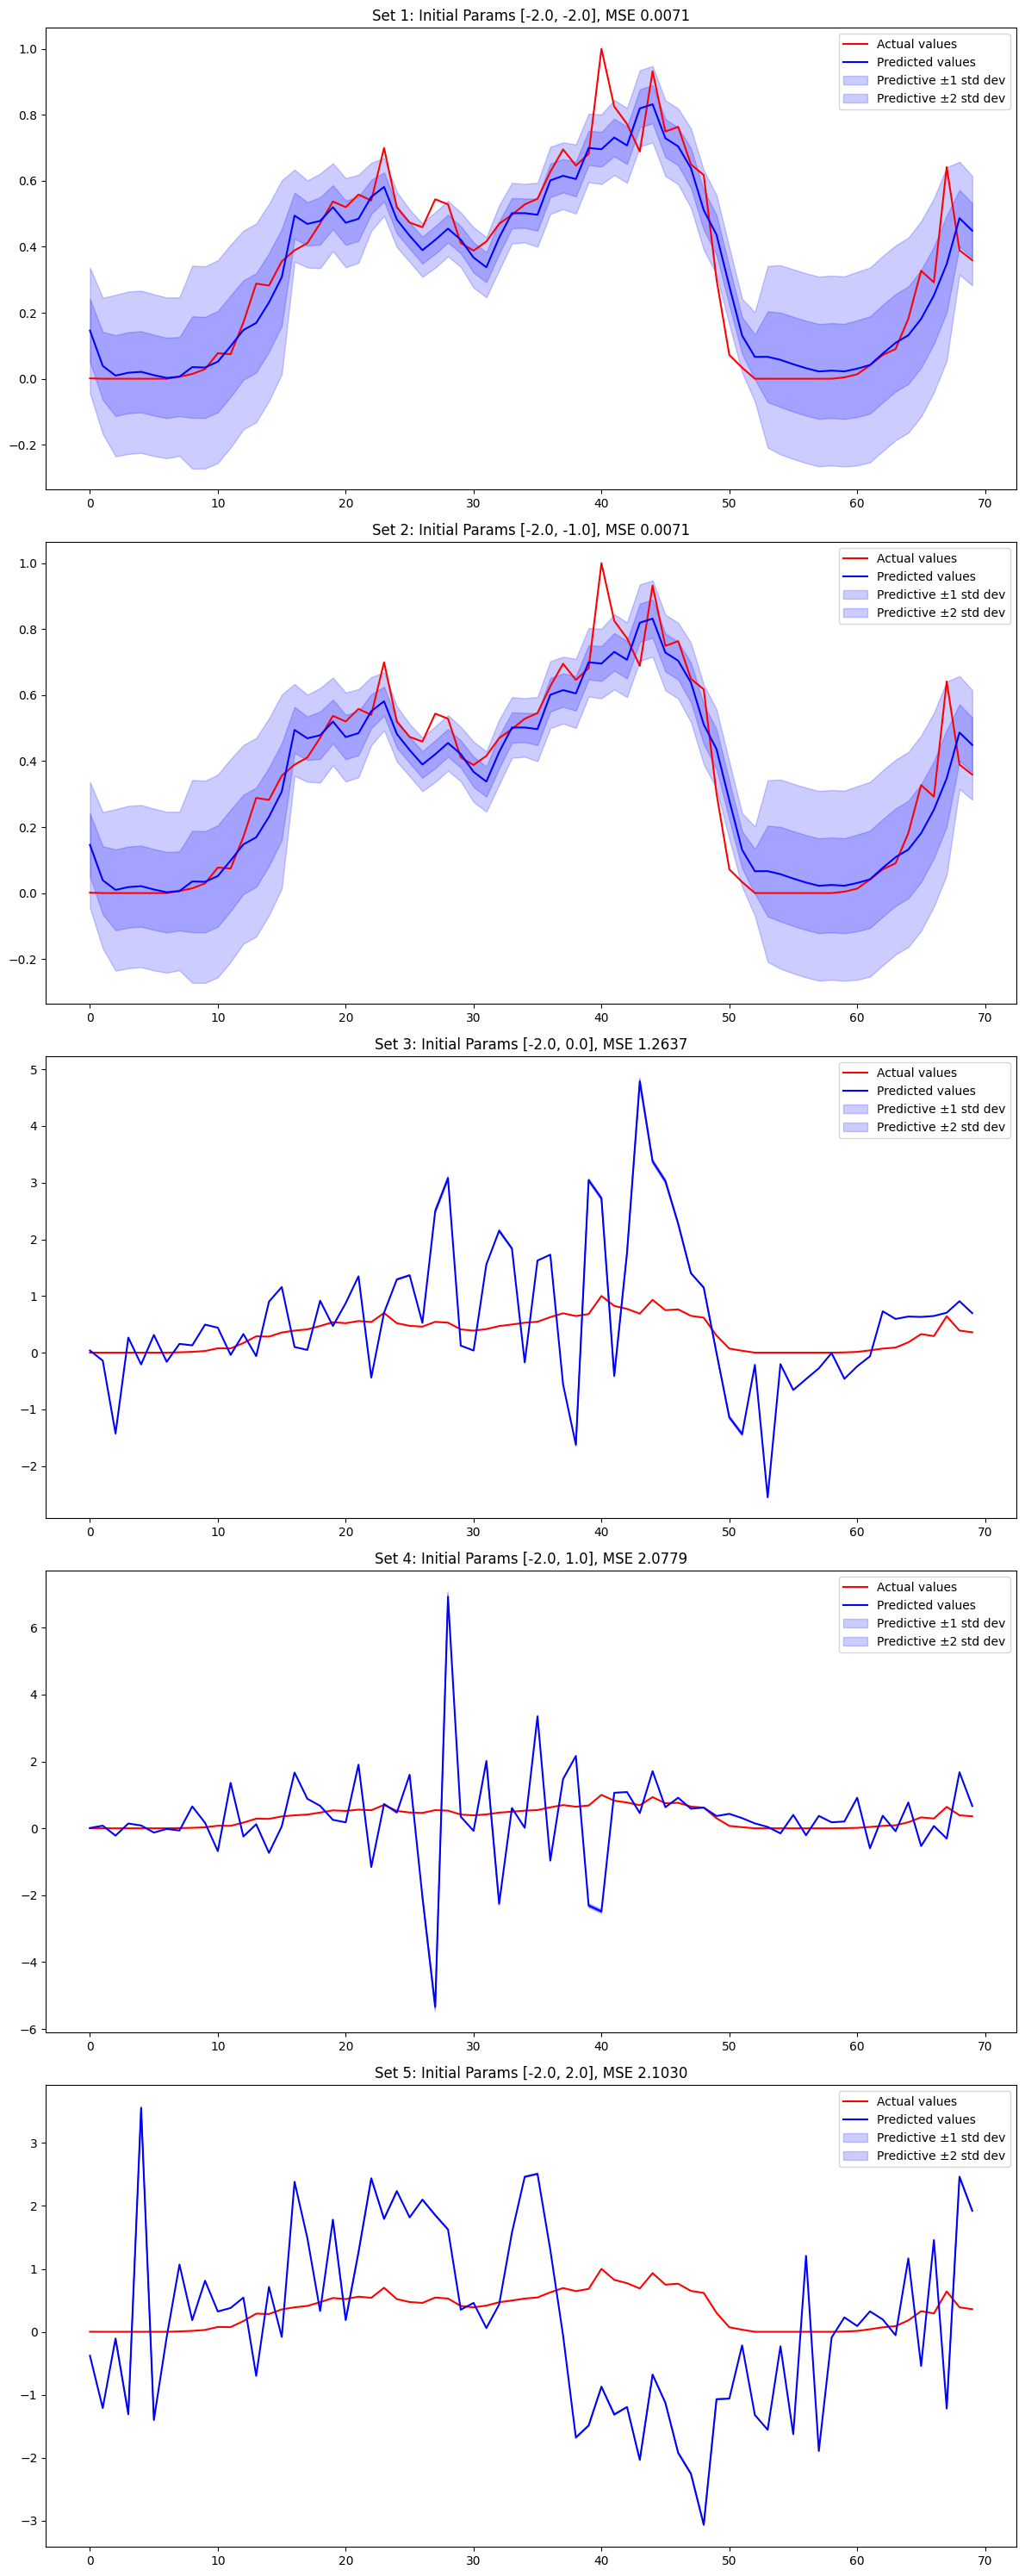

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 上位5つのパラメータセットでモデルを訓練し、プロット
top_k_results = 5  # 上位何セットを表示するか
fig, axs = plt.subplots(top_k_results, 1, figsize=(12, 6 * top_k_results))

for i, ((initial_params, mse), ax) in enumerate(zip(mse_results[:top_k_results], axs)):
    optimal_params = initial_params  # 最適化されたパラメータ
    y_pred, std = gpr(x_train, y_train, x_test, kernel, optimal_params)
    
    ax.plot(y_test, 'r-', label='Actual values')
    ax.plot(y_pred, 'b-', label='Predicted values')
    ax.fill_between(np.arange(len(y_pred)), y_pred - 1 * std, y_pred + 1 * std, color='blue', alpha=0.2, label='Predictive ±1 std dev')
    ax.fill_between(np.arange(len(y_pred)), y_pred - 2 * std, y_pred + 2 * std, color='blue', alpha=0.2, label='Predictive ±2 std dev')
    ax.set_title(f'Set {i+1}: Initial Params {params_list[i]}, MSE {mse:.4f}')
    ax.legend()

plt.tight_layout()
plt.show()


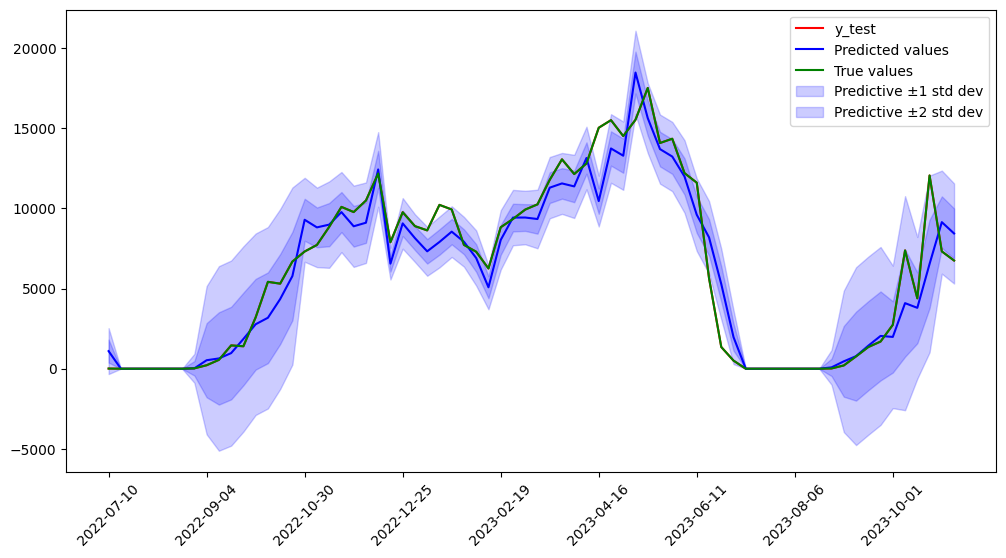

In [ ]:
# 上位 N 番目のモデルを使用
N = 1  # 上位1番目のモデルを使用
optimal_params = mse_results[N-1][0]  # 上位 N 番目の最適化されたパラメータを取得

# モデルを使用して予測
y_pred, std = gpr(x_train, y_train, x_test, kernel, optimal_params)
# 日付の表示間隔を設定
interval = len(hoge_date) // 8  # 要調整
product = y_test * hoge
pred_product = y_pred * hoge
scaled_product = product * max_week_shipment
scaled_pred = pred_product * max_week_shipment
pred_std = std * hoge * max_week_shipment
# プロット
plt.figure(figsize=(12, 6))
plt.plot(hoge_date_np, scaled_product, 'r-', label="y_test")
plt.plot(hoge_date_np, abs(scaled_pred), 'b-', label="Predicted values")
plt.plot(hoge_date_np, after_cutoff["Answer"][n:], 'g-', label="True values")
plt.fill_between(hoge_date_np, scaled_pred - 1 * pred_std, scaled_pred + 1 * pred_std, color='blue', alpha=0.2, label='Predictive ±1 std dev')
plt.fill_between(hoge_date_np, scaled_pred - 2 * pred_std, scaled_pred + 2 * pred_std, color='blue', alpha=0.2, label='Predictive ±2 std dev')
plt.xticks(hoge_date_np[::interval], rotation=45)  # 45度に回
plt.legend()
plt.show()


data = {
    "week_shipment": after_cutoff["Answer"],
    "pred": scaled_pred
}
df = pd.DataFrame(data)
df.to_csv("./Week_Shipment_Prediction.csv", index=False)

#for i in hoge:
   # print(i)

In [ ]:
# 誤差の絶対値を計算
df['error'] = np.abs(df['week_shipment'] - df['pred'])

# 誤差が1000以上のケースの数を数える
errors_over_1000 = (df['error'] >= 1000).sum()

# 全データ点数
total_cases = len(df)

# 誤差が1000以上の割合を計算
error_rate = errors_over_1000 / total_cases

# 平均絶対誤差 (MAE) を計算
mae = df['error'].mean()

print(f"The proportion of cases where the error is 1000 or more is: {error_rate:.2%}")
print(f"The Mean Absolute Error (MAE) is: {mae:.2f}")

The proportion of cases where the error is 1000 or more is: 29.41%
The Mean Absolute Error (MAE) is: 948.41
